In [1]:
#preprocessing tools
import pandas as pd
import numpy as np
import re

#EDA Tools
import pandas_profiling
%matplotlib inline
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

#modeling
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import svm
from sklearn.tree import DecisionTreeRegressor
from lightgbm import LGBMRegressor

## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost as xgb
from sklearn.model_selection import train_test_split


import warnings
warnings.filterwarnings('ignore')

## preprocessing

In [2]:
train_data=pd.read_csv('Data_Train.csv')

In [3]:
train_data.shape

(78458, 11)

In [4]:
test_data=pd.read_csv('Data_Test.csv')

In [5]:
test_data.shape

(19615, 10)

In [6]:
data=pd.concat([train_data,test_data],axis='rows',sort=True)

In [7]:
data.shape

(98073, 11)

In [8]:
data.columns

Index(['Comments', 'Country', 'Followers', 'Genre', 'Likes', 'Name',
       'Popularity', 'Song_Name', 'Timestamp', 'Unique_ID', 'Views'],
      dtype='object')

In [9]:
data.head()

,Comments,Country,Followers,Genre,Likes,Name,Popularity,Song_Name,Timestamp,Unique_ID,Views
0,4,AU,119563,danceedm,499,Hardstyle,97,N-Vitral presents BOMBSQUAD - Poison Spitter (...,2018-03-30 15:24:45.000000,413890,14017.0
1,17,AU,2141,danceedm,49,Dj Aladdin,17,Dj Aladdin - Old School Hip Hop Quick Mix,2016-06-20 05:58:52.000000,249453,1918.0
2,11,AU,22248,danceedm,312,Maxximize On Air,91,Maxximize On Air - Mixed by Blasterjaxx - Epis...,2015-05-08 17:45:59.000000,681116,9668.0
3,2,AU,393655,rbsoul,"2,400",GR6 EXPLODE,76,MC Yago - Tenho Compromisso (DJ R7),2017-06-08 23:50:03.000000,387253,113036.0
4,81,AU,201030,danceedm,"3,031",Tritonal,699,Escape (feat. Steph Jones),2016-09-17 20:50:19.000000,1428029,110024.0


In [10]:
data.describe()

,Comments,Followers,Unique_ID,Views
count,98073.000000,9.807300e+04,9.807300e+04,7.845800e+04
mean,115.987591,4.796740e+05,7.458773e+05,5.469686e+05
std,756.416793,1.168391e+06,4.807398e+05,3.883085e+06
min,0.000000,1.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000,1.778400e+04,3.205090e+05,6.216500e+03
50%,12.000000,8.892700e+04,6.618980e+05,2.538650e+04
75%,61.000000,3.936550e+05,1.176694e+06,1.201342e+05
max,104082.000000,9.789123e+06,1.570012e+06,1.994050e+08


In [11]:
data.drop(columns=['Unique_ID'],inplace=True)

In [12]:
data.columns

Index(['Comments', 'Country', 'Followers', 'Genre', 'Likes', 'Name',
       'Popularity', 'Song_Name', 'Timestamp', 'Views'],
      dtype='object')

In [13]:
##pandas_profiling.ProfileReport(data)

In [14]:
data.drop(columns='Country',inplace = True)

In [15]:
data.columns

Index(['Comments', 'Followers', 'Genre', 'Likes', 'Name', 'Popularity',
       'Song_Name', 'Timestamp', 'Views'],
      dtype='object')

In [16]:
data['Followers'].isna().sum()

0

In [17]:
data['Genre'].isna().sum()

0

In [18]:
data['Name'].isna().sum()

0

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98073 entries, 0 to 19614
Data columns (total 9 columns):
Comments      98073 non-null int64
Followers     98073 non-null int64
Genre         98073 non-null object
Likes         98073 non-null object
Name          98073 non-null object
Popularity    98073 non-null object
Song_Name     98072 non-null object
Timestamp     98073 non-null object
Views         78458 non-null float64
dtypes: float64(1), int64(2), object(6)
memory usage: 7.5+ MB


In [20]:
data['Likes'].isna().sum()

0

In [21]:
def converThousandsToUnits(x):
    th=x.split('.')
    if(len(th) == 1):
        dotSeprator = th[0].replace('K','')
        return pd.to_numeric(dotSeprator+'000')
    else:
        dotSeprator = th[1].replace('K','')
        return pd.to_numeric(th[0]+dotSeprator+''.ljust(3-len(dotSeprator), '0'))

In [22]:
def converMillionToUnits(x):
    th=x.split('.')
    if(len(th) == 1):
        dotSeprator = th[0].replace('M','')
        return pd.to_numeric(dotSeprator+'000000')
    else:
        dotSeprator = th[1].replace('M','')
        return pd.to_numeric(th[0]+dotSeprator+''.ljust(6-len(dotSeprator), '0'))

In [23]:
def convertObjectToInt(x):
    if(not re.compile(',') .search(x) == None):
        return pd.to_numeric(x.replace(',',''))
    elif(not re.compile('K') .search(x) == None):
        return converThousandsToUnits(x)
    elif(not re.compile('M') .search(x) == None):
        return converMillionToUnits(x)
    else:
        return pd.to_numeric(x)

In [24]:
data['Likes']=data['Likes'].apply(lambda x : convertObjectToInt(x))

In [25]:
data['Likes'].unique()

array([ 499,   49,  312, ..., 7093, 7908, 9138], dtype=int64)

In [26]:
data['Popularity'].isna().sum()

0

In [27]:
data['Popularity']=data['Popularity'].apply(lambda x : convertObjectToInt(x))

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98073 entries, 0 to 19614
Data columns (total 9 columns):
Comments      98073 non-null int64
Followers     98073 non-null int64
Genre         98073 non-null object
Likes         98073 non-null int64
Name          98073 non-null object
Popularity    98073 non-null int64
Song_Name     98072 non-null object
Timestamp     98073 non-null object
Views         78458 non-null float64
dtypes: float64(1), int64(4), object(4)
memory usage: 7.5+ MB


In [29]:
data[pd.isnull(data['Song_Name'])]

,Comments,Followers,Genre,Likes,Name,Popularity,Song_Name,Timestamp,Views
31398,540,440088,electronic,705,San Holo,178,NaN,2015-01-17 23:57:50.000000,128906.0


In [30]:
data.drop(data.index[31398],inplace =True)

In [31]:
def convertObjectToTime(x):
    return pd.to_datetime(x);

In [32]:
data['Timestamp'].isna().sum()

0

In [33]:
data['Timestamp']=data['Timestamp'].apply(lambda x : convertObjectToTime(x))

In [34]:
data.head()

,Comments,Followers,Genre,Likes,Name,Popularity,Song_Name,Timestamp,Views
0,4,119563,danceedm,499,Hardstyle,97,N-Vitral presents BOMBSQUAD - Poison Spitter (...,2018-03-30 15:24:45,14017.0
1,17,2141,danceedm,49,Dj Aladdin,17,Dj Aladdin - Old School Hip Hop Quick Mix,2016-06-20 05:58:52,1918.0
2,11,22248,danceedm,312,Maxximize On Air,91,Maxximize On Air - Mixed by Blasterjaxx - Epis...,2015-05-08 17:45:59,9668.0
3,2,393655,rbsoul,2400,GR6 EXPLODE,76,MC Yago - Tenho Compromisso (DJ R7),2017-06-08 23:50:03,113036.0
4,81,201030,danceedm,3031,Tritonal,699,Escape (feat. Steph Jones),2016-09-17 20:50:19,110024.0


In [35]:
def deEmojify(inputString):
    encoded = inputString.encode('ascii', 'ignore').decode('ascii')
    return re.sub('[^A-Za-z0-9]+', '', encoded)

In [36]:
data['Name']=data['Name'].apply(lambda x : deEmojify(x))

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98072 entries, 0 to 19614
Data columns (total 9 columns):
Comments      98072 non-null int64
Followers     98072 non-null int64
Genre         98072 non-null object
Likes         98072 non-null int64
Name          98072 non-null object
Popularity    98072 non-null int64
Song_Name     98072 non-null object
Timestamp     98072 non-null datetime64[ns]
Views         78457 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(4), object(3)
memory usage: 7.5+ MB


## Explorartory Data Analysis(EDA)

In [38]:
data.corr()

,Comments,Followers,Likes,Popularity,Views
Comments,1.000000,0.081608,0.636892,0.628268,0.679107
Followers,0.081608,1.000000,0.110679,0.136891,0.103603
Likes,0.636892,0.110679,1.000000,0.867272,0.980132
Popularity,0.628268,0.136891,0.867272,1.000000,0.834635
Views,0.679107,0.103603,0.980132,0.834635,1.000000


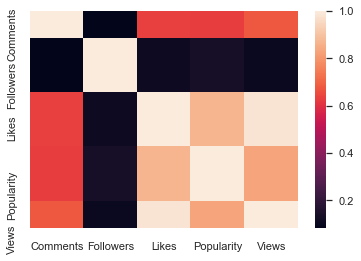

In [39]:
sns.heatmap(data.corr())

## Feature Engineering

In [40]:
categorical_data=data.select_dtypes(exclude=np.number).drop(columns=['Timestamp','Song_Name'])

In [41]:
one_hot_encoding_data = pd.get_dummies(categorical_data)

In [42]:
numeric_value = data.select_dtypes(include=np.number);

In [43]:
numeric_value.columns

Index(['Comments', 'Followers', 'Likes', 'Popularity', 'Views'], dtype='object')

In [44]:
data_preprocessed = pd.concat([one_hot_encoding_data,numeric_value],axis='columns')

In [45]:
data_preprocessed

,Genre_all-music,Genre_alternativerock,Genre_ambient,Genre_classical,Genre_country,Genre_danceedm,Genre_deephouse,Genre_disco,Genre_drumbass,Genre_dubstep,...,Name_wwwAreaDugemnet,Name_xantacular,Name_xavierdang,Name_yung187,Name_zpk,Comments,Followers,Likes,Popularity,Views
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,4,119563,499,97,14017.0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,17,2141,49,17,1918.0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,11,22248,312,91,9668.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,393655,2400,76,113036.0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,81,201030,3031,699,110024.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19610,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,17,357007,1775,341,NaN
19611,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,12,17356,2095,305,NaN
19612,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,5,165268,39,12,NaN
19613,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,113,52573,3754,666,NaN


In [46]:
data_preprocessed


,Genre_all-music,Genre_alternativerock,Genre_ambient,Genre_classical,Genre_country,Genre_danceedm,Genre_deephouse,Genre_disco,Genre_drumbass,Genre_dubstep,...,Name_wwwAreaDugemnet,Name_xantacular,Name_xavierdang,Name_yung187,Name_zpk,Comments,Followers,Likes,Popularity,Views
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,4,119563,499,97,14017.0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,17,2141,49,17,1918.0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,11,22248,312,91,9668.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,393655,2400,76,113036.0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,81,201030,3031,699,110024.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19610,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,17,357007,1775,341,NaN
19611,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,12,17356,2095,305,NaN
19612,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,5,165268,39,12,NaN
19613,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,113,52573,3754,666,NaN


In [47]:
train=data_preprocessed[data_preprocessed['Views'].notna()]
test=data_preprocessed[data_preprocessed['Views'].isna()]

In [48]:
train.shape

(78457, 1236)

In [49]:
test.shape

(19615, 1236)

In [50]:
x_train = train.drop(columns=['Views'])

In [51]:
y_train = train['Views']

In [52]:
x_test = test.drop(columns=['Views'])

In [53]:
x_train.shape

(78457, 1235)

In [54]:
y_train.shape

(78457,)

In [55]:
x_test.shape

(19615, 1235)

## Modeling

In [56]:
def modal_fit(modal,x_train,y_train,x_test,fileName):
    print("Modal Fit")
    modal.fit(x_train,y_train);
    print("Modal Fit Done")
    y_train_predicated=modal.predict(x_train);
    print("Root Mean Square Error ",np.sqrt(mean_squared_error(y_train,y_train_predicated)))
   ## print("cross validation ::",np.sqrt(np.mean(np.abs(cross_val_score(modal,x,y,cv=20,scoring="neg_mean_squared_error")))))
    y_test_predicated = modal.predict(x_test);
    y_test_predicated_df = pd.DataFrame(y_test_predicated,columns= ["Views"])
    result = pd.concat([test_data[['Unique_ID']],y_test_predicated_df],axis=1)
    result.to_excel(fileName,index=False)

In [58]:
linear = LinearRegression()

In [59]:
modal_fit(linear,x_train,y_train,x_test,'Linear.xlsx')

Root Mean Square Error  646417.8407789394


In [57]:
regressor=xgb.XGBRegressor(objective ='reg:squarederror',n_estimators=500)

In [58]:
modal_fit(regressor,x_train,y_train,x_test,'xgboost.xlsx')

Modal Fit
Modal Fit Done
Root Mean Square Error  302918.97576100205


In [63]:
## With Gradient Boosting Regression, I got 1st place in machine hack.
{'subsample': 0.8,
 'n_estimators': 800,
 'min_child_weight': 4,
 'max_depth': 10,
 'learning_rate': '0.05'}

{'subsample': 0.8,
 'n_estimators': 800,
 'min_child_weight': 4,
 'max_depth': 10,
 'learning_rate': '0.05'}

In [59]:
 gradientBoosting = GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=3000,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False) ##132719.36465418563 3000

In [60]:
modal_fit(gradientBoosting, x_train,y_train,x_test, "model_GradientBoosting_3000.xlsx" )##416087.7800047383 
## 211227.20912673234 Max depth 7

Modal Fit
Modal Fit Done
Root Mean Square Error  211710.0160595832


In [104]:
 gradientBoosting = GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=5000,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False) ##132719.36465418563 3000

In [ ]:
modal_fit(gradientBoosting, x_train,y_train,x_test, "model_GradientBoosting.xlsx" )

In [67]:
lasso = Lasso(alpha=10,normalize = True)
modal_fit(lasso, x_train,y_train,x_test, "model_lasso_solution.xlsx" )

Root Mean Square Error  650841.5237842987


In [68]:
ridge = Ridge()
modal_fit(ridge, x_train,y_train,x_test, "model_lasso_solution.xlsx" )

Root Mean Square Error  648147.6557686796


In [69]:
elastic = ElasticNet(alpha=0.4,l1_ratio=0.5)
modal_fit(elastic, x_train,y_train,x_test, "model_elastic_solution.xlsx" )

Root Mean Square Error  726594.9259484044


In [70]:
adaBoost = AdaBoostRegressor()

In [71]:
modal_fit(adaBoost, x_train,y_train,x_test, "model_adaBoost.xlsx" )

Root Mean Square Error  1148843.8573889919


In [72]:
random = RandomForestRegressor()

In [73]:
modal_fit(random, x_train,y_train,x_test, "model_randomForest.xlsx" )

Root Mean Square Error  299241.0765329792


In [74]:
regr_1 = DecisionTreeRegressor(max_depth=150)

In [75]:
modal_fit(regr_1, x_train,y_train,x_test, "model_decision_tress_tunning.xlsx" )

Root Mean Square Error  1056.6815481589124


In [76]:
lgb=LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.01, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=750, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [77]:
lgb

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.01, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=750, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [78]:
modal_fit(lgb, x_train,y_train,x_test, "light_gradient_boosting_750.xlsx" )

Root Mean Square Error  1085777.5701531356


## HyperTunning

In [79]:
 x_train_hyper,x_test_hyper,y_train_hyper,y_test_hyper=train_test_split(x_train, y_train, test_size = 0.3, random_state=1)

In [80]:
def model_accuracy(model,x_train_hyper,x_test_hyper,y_train_hyper,y_test_hyper):
    model.fit(x_train_hyper, y_train_hyper)
    y_train_predicated = model.predict(x_train_hyper)
    y_test_predicated = model.predict(x_test_hyper)
    return  np.sqrt(mean_squared_error(y_train_hyper,y_train_predicated)), np.sqrt(mean_squared_error(y_test_hyper,y_test_predicated));

### max depth

In [81]:
def check_dept(max_depth_check):
    train_acc_list= []
    test_acc_list = []
    for i in max_depth_check:
        print("Max_ Depth ----------------------- = ",i)
        dt = DecisionTreeRegressor(max_depth=i,splitter='random',min_samples_leaf=4,min_weight_fraction_leaf=0.5)
        train_acc, test_acc = model_accuracy(dt, x_train_hyper,x_test_hyper,y_train_hyper,y_test_hyper)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
    return train_acc_list, test_acc_list

In [82]:
max_depth=[70,80,90,100,110,120,130,140,150];

In [83]:
train_acc, test_acc = check_dept(max_depth)

Max_ Depth ----------------------- =  70
Max_ Depth ----------------------- =  80
Max_ Depth ----------------------- =  90
Max_ Depth ----------------------- =  100
Max_ Depth ----------------------- =  110
Max_ Depth ----------------------- =  120
Max_ Depth ----------------------- =  130
Max_ Depth ----------------------- =  140
Max_ Depth ----------------------- =  150


In [84]:
resut = pd.DataFrame([max_depth,train_acc,test_acc]).T

In [85]:
resut.columns = ["max_depth", "train", "test"]

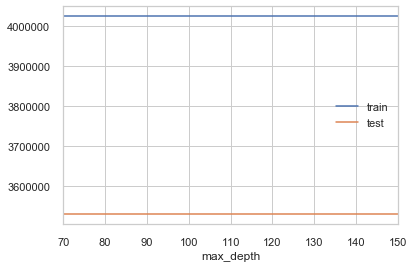

In [86]:
resut.plot(x = "max_depth",y=["train","test"])

In [87]:
def check_splitter(splitter):
    train_acc_list= []
    test_acc_list = []
    for i in splitter:
        print("Max_ Depth ----------------------- = ",i)
        dt = DecisionTreeRegressor(max_depth=3,splitter='best')
        train_acc, test_acc = model_accuracy(dt, x_train_hyper,x_test_hyper,y_train_hyper,y_test_hyper)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
    return train_acc_list, test_acc_list

In [88]:
splitter = ["best","random"]

In [89]:
train_acc, test_acc = check_splitter(splitter)

Max_ Depth ----------------------- =  best
Max_ Depth ----------------------- =  random


In [90]:
resut = pd.DataFrame([splitter,train_acc,test_acc]).T

In [91]:
resut.columns = ["splitter", "train", "test"]

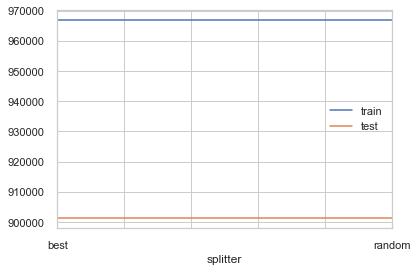

In [92]:
resut.plot(x = "splitter",y=["train","test"])

In [93]:
def check_min_samples_leaf(min_samples_leaf):
    train_acc_list= []
    test_acc_list = []
    for i in min_samples_leaf:
        print("Max_ Depth ----------------------- = ",i)
        dt = DecisionTreeRegressor(max_depth=10,splitter='random',min_samples_leaf=i)
        train_acc, test_acc = model_accuracy(dt, x_train_hyper,x_test_hyper,y_train_hyper,y_test_hyper)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
    return train_acc_list, test_acc_list

In [94]:
min_samples_leaf = [10,15,20,25,30,35,40,45,50]

Max_ Depth ----------------------- =  10
Max_ Depth ----------------------- =  15
Max_ Depth ----------------------- =  20
Max_ Depth ----------------------- =  25
Max_ Depth ----------------------- =  30
Max_ Depth ----------------------- =  35
Max_ Depth ----------------------- =  40
Max_ Depth ----------------------- =  45
Max_ Depth ----------------------- =  50


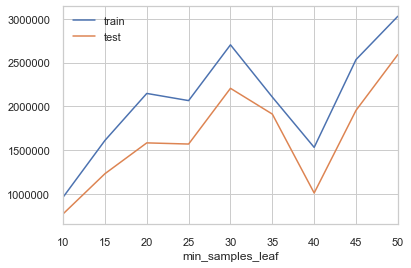

In [95]:
train_acc, test_acc = check_min_samples_leaf(min_samples_leaf)
resut = pd.DataFrame([min_samples_leaf,train_acc,test_acc]).T
resut.columns = ["min_samples_leaf", "train", "test"]
resut.plot(x = "min_samples_leaf",y=["train","test"])

In [96]:
def check_min_weight_fraction_leaf(min_weight_fraction_leaf):
    train_acc_list= []
    test_acc_list = []
    for i in min_weight_fraction_leaf:
        print("Max_ Depth ----------------------- = ",i)
        dt = DecisionTreeRegressor(max_depth=3,splitter='best',min_samples_leaf=4,min_weight_fraction_leaf=i)
        train_acc, test_acc = model_accuracy(dt, x_train_hyper,x_test_hyper,y_train_hyper,y_test_hyper)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
    return train_acc_list, test_acc_list

In [97]:
min_weight_fraction_leaf = [0.1,0.2,0.3,0.4,0.5]

Max_ Depth ----------------------- =  0.1
Max_ Depth ----------------------- =  0.2
Max_ Depth ----------------------- =  0.3
Max_ Depth ----------------------- =  0.4
Max_ Depth ----------------------- =  0.5


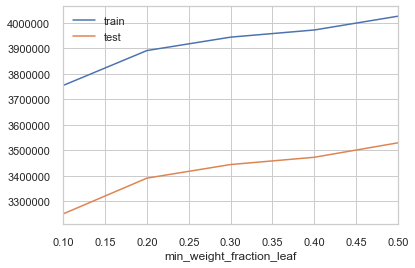

In [98]:
train_acc, test_acc = check_min_weight_fraction_leaf(min_weight_fraction_leaf)
resut = pd.DataFrame([min_weight_fraction_leaf,train_acc,test_acc]).T
resut.columns = ["min_weight_fraction_leaf", "train", "test"]
resut.plot(x = "min_weight_fraction_leaf",y=["train","test"])

In [99]:
def check_max_leaf_nodes(max_leaf_nodes):
    train_acc_list= []
    test_acc_list = []
    for i in max_leaf_nodes:
        print("max_leaf_nodes ----------------------- = ",i)
        dt = DecisionTreeRegressor(max_depth=3,splitter='best',min_samples_leaf=4,min_weight_fraction_leaf=0.5,max_leaf_nodes=i)
        train_acc, test_acc = model_accuracy(dt, x_train_hyper,x_test_hyper,y_train_hyper,y_test_hyper)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
    return train_acc_list, test_acc_list

In [100]:
max_leaf_nodes =[None,10,20,30,40,50,60,70]

In [101]:
train_acc, test_acc = check_max_features(max_leaf_nodes)
resut = pd.DataFrame([max_leaf_nodes,train_acc,test_acc]).T
resut.columns = ["max_leaf_nodes", "train", "test"]
resut.plot(x = "max_leaf_nodes",y=["train","test"])

NameError: name 'check_max_features' is not defined

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Various learning rate parameters
learning_rate = ['0.05','0.1', '0.2','0.3','0.5','0.6']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
#Subssample parameter values
subsample=[0.7,0.6,0.8]
# Minimum child weight parameters
min_child_weight=[3,4,5,6,7]

In [ ]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'learning_rate': learning_rate,
               'max_depth': max_depth,
               'subsample': subsample,
               'min_child_weight': min_child_weight}

print(random_grid)

In [ ]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
xg_random = RandomizedSearchCV(estimator = gradientBoosting, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 5, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [ ]:
 x_train_hyper,x_test_hyper,y_train_hyper,y_test_hyper=train_test_split(x_train, y_train, test_size = 0.3, random_state=1)

In [ ]:
x_train_hyper.shape

In [ ]:
n_estimators = [1,2,3,4,5,6,7,8,9,10]
n_estimators

In [ ]:
def check_n_estimators(n_estimators):
    train_acc_list= []
    test_acc_list = []
    for i in n_estimators:
        print("learning_rate ----------------------- = ",i)
        gradientBoosting = GradientBoostingRegressor(n_estimators=i)
        train_acc, test_acc = model_accuracy(gradientBoosting, x_train_hyper,x_test_hyper,y_train_hyper,y_test_hyper)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
    return train_acc_list, test_acc_list

In [ ]:
train_acc, test_acc = check_n_estimators(n_estimators)


In [ ]:
resut = pd.DataFrame([n_estimators,train_acc,test_acc]).T
resut.columns = ["n_estimators", "train", "test"]
resut.plot(x = "n_estimators",y=["train","test"])